In [1]:
# 1 Зниження розмірності і візуалізація даних

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn import preprocessing
import seaborn as sns
import pandas as pd
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


df = pd.read_csv("../lab1/diabetes.csv")

scaler = preprocessing.MinMaxScaler()
d = scaler.fit_transform(df)
df = pd.DataFrame(d, columns=list(df))
df.head()

X = df.drop('Outcome', axis=1)
y = df['Outcome']

<Axes: xlabel='principal_component_1', ylabel='principal_component_2'>

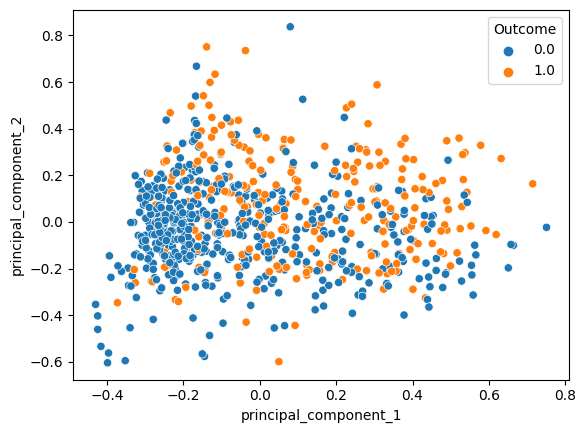

In [2]:
# 1.1 PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
X_pca = pd.DataFrame({'principal_component_1': X_pca[:,0], 'principal_component_2': X_pca[:,1]})
pca_df = pd.concat([X_pca, y], axis = 1)
sns.scatterplot(data=pca_df, x='principal_component_1', y='principal_component_2', hue='Outcome') 

<Axes: xlabel='tsne_1', ylabel='tsne_2'>

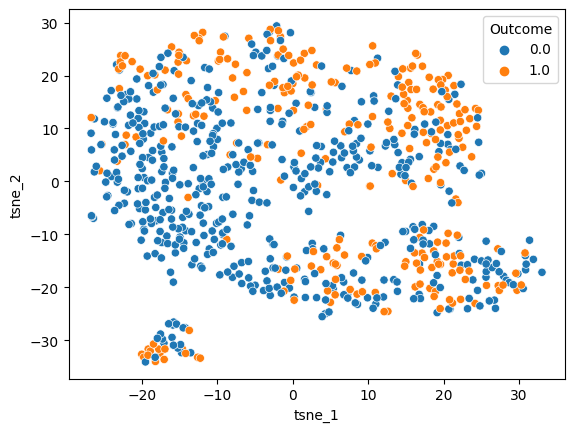

In [3]:
# 1.2 TSNE

tsne = TSNE(n_components=2, learning_rate='auto', init='pca')
X_tsne = tsne.fit_transform(X)
X_tsne=pd.DataFrame({'tsne_1': X_tsne[:,0], 'tsne_2': X_tsne[:,1]})
tsne_df = pd.concat([X_tsne, y], axis = 1)
sns.scatterplot(data=tsne_df, x='tsne_1', y='tsne_2', hue='Outcome')

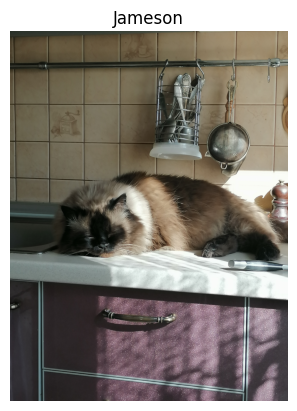

In [50]:
# 2 Кластерний аналіз

from sklearn.cluster import KMeans
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

colors = [64, 32, 16, 8, 4, 2]
img = Image.open('my_cat.jpg')
img = np.array(img, dtype=np.float64) / 255

w, h, d = tuple(img.shape)
assert d == 3
img_arr = np.reshape(img, (w * h, d))

img_arr_sample = shuffle(img_arr, random_state=0, n_samples=1_000)
kmeans_arr = []
labels_arr = []
for i in range(len(colors)):
    kmeans_arr.append(KMeans(n_clusters=colors[i], random_state=0).fit(img_arr_sample))
    labels_arr.append(kmeans_arr[i].predict(img_arr))

plt.figure()
plt.axis("off")
plt.title("Jameson")
plt.imshow(img)

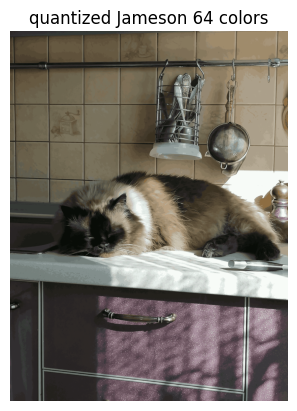

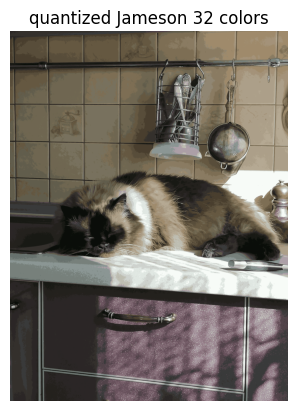

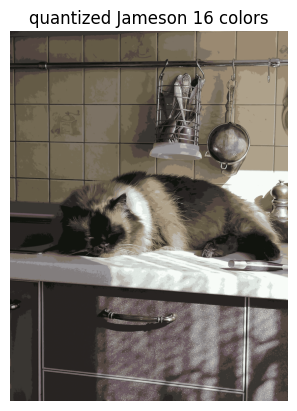

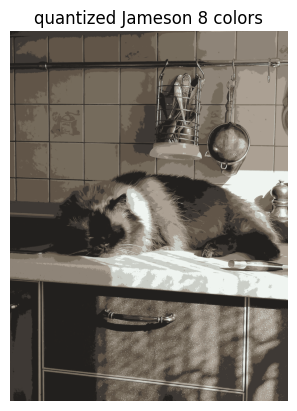

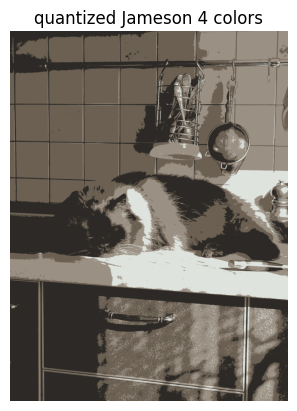

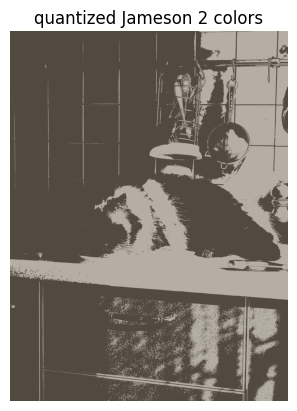

In [51]:
for i in range(len(colors)):
    plt.figure()
    plt.axis("off")
    plt.title(f"quantized Jameson {colors[i]} colors")
    plt.imshow(kmeans_arr[i].cluster_centers_[labels_arr[i]].reshape(w, h, -1))

In [6]:
# 3 Обробка та класифікація текстових даних

#https://www.kaggle.com/datasets/noahx1/elden-ring-steam-reviews
df = pd.read_csv('elden_ring_steam_reviews.csv', encoding='latin-1')
df = df[['review', 'voted_up']]

df

,review,voted_up
0,being killed over and over again is fun,True
1,I write this review as I have 100% completed E...,True
2,Fun,True
3,pretty cool.,True
4,AMAZINGGGGGGGGGGGGG,True
...,...,...
9789,Best platformer of the year.,True
9790,"truly fun...very recommended, worth the money ...",True
9791,mimic is the friend we made along the way,True
9792,"The lands of Elden Ring are vast and wild, fil...",True


In [7]:
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS

def cleaning(raw_review):
    try:
        value = ''.join(c.lower() for c in raw_review if (c.isalpha() or c == ' '))
        clean_review = ''
        for i in value.split(' '):
            if i not in stopwords.words("english"):
                clean_review += i + ' '
        return clean_review
    except Exception as err:
        print(err)

df['review'] = df['review'].apply(cleaning)

df.info()
df = df.dropna()

'float' object is not iterable
'float' object is not iterable
'float' object is not iterable
'float' object is not iterable
'float' object is not iterable
'float' object is not iterable
'float' object is not iterable
'float' object is not iterable
'float' object is not iterable
'float' object is not iterable
'float' object is not iterable
'float' object is not iterable
'float' object is not iterable
'float' object is not iterable
'float' object is not iterable
'float' object is not iterable
'float' object is not iterable
'float' object is not iterable
'float' object is not iterable
'float' object is not iterable
'float' object is not iterable
'float' object is not iterable
'float' object is not iterable
'float' object is not iterable
'float' object is not iterable
'float' object is not iterable
'float' object is not iterable
'float' object is not iterable
'float' object is not iterable
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9794 entries, 0 to 9793
Data columns (total 2 colum

,review,voted_up
0,killed fun,True
1,write review completed elden ring yet despite...,True
2,fun,True
3,pretty cool,True
4,amazinggggggggggggg,True
...,...,...
9789,best platformer year,True
9790,truly funvery recommended worth money time,True
9791,mimic friend made along way,True
9792,lands elden ring vast wild filled dangers lurk...,True


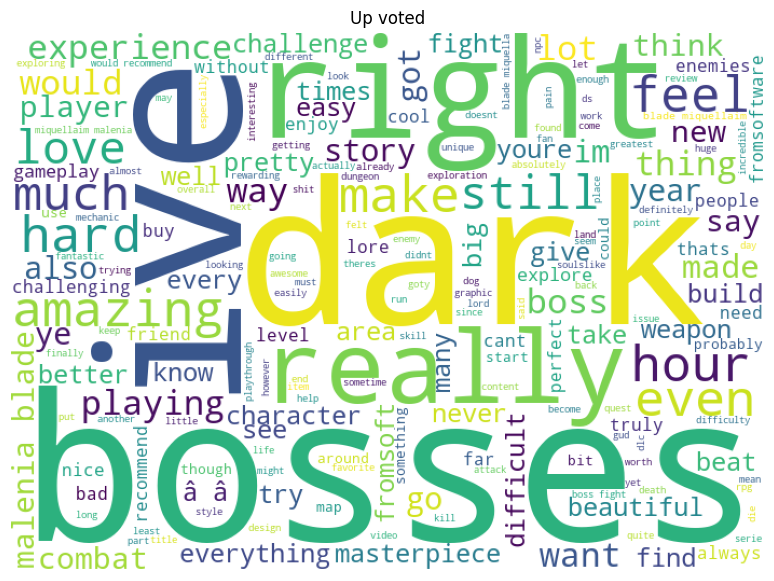

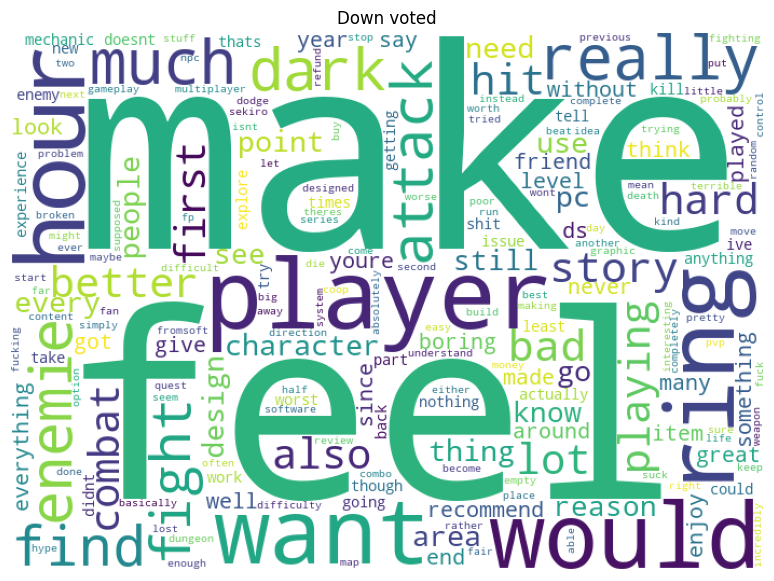

In [52]:

from collections import Counter

for i in [True, False]:
    text = ''
    for j in df[df['voted_up'] == i]['review']:
        text += f"{j} "
    custom_stop_words = list(dict(sorted(Counter(text.split()).items(), key=lambda x:x[1], reverse=True)).keys())[:20]
    wc_figure = WordCloud(stopwords=custom_stop_words, background_color='white', width=700, height=500).generate(text)
    plt.figure(figsize=(10,7), frameon=True)
    if i: plt.title("Up voted")
    else: plt.title("Down voted")
    plt.imshow(wc_figure)  
    plt.axis('off')
    plt.show()

In [49]:

from sklearn. metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

X = df['review']
y = df['voted_up']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)
tfidfv = TfidfVectorizer()

X_train_vectorised = tfidfv.fit_transform(X_train)
X_test_vectorised = tfidfv.transform(X_test)

accuracy = []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train_vectorised, y_train)
    y_pred = knn.predict(X_test_vectorised)
    accuracy.append(accuracy_score(y_test, y_pred))
    
best_k = accuracy.index(max(accuracy))+1

print(f"the highest accuracy is {accuracy[best_k - 1]} at K = {best_k}")

knn = KNeighborsClassifier(n_neighbors = best_k)
knn.fit(X_train_vectorised, y_train)
y_pred = knn.predict(X_test_vectorised)

print(classification_report(y_test,y_pred))

print(confusion_matrix(y_test, y_pred))

the highest accuracy is 0.9370199692780338 at K = 19
              precision    recall  f1-score   support

       False       1.00      0.01      0.02       124
        True       0.94      1.00      0.97      1829

    accuracy                           0.94      1953
   macro avg       0.97      0.50      0.49      1953
weighted avg       0.94      0.94      0.91      1953

[[   1  123]
 [   0 1829]]
